##Fix geometry

In [1]:
import geopandas as g

In [2]:
ebola_gdf = g.GeoDataFrame.from_file("data/in/ebola_outbreaks_before_2014-geocoded_on_cartodb.geojson")

In [3]:
ebola_gdf

,cartodb_georef_status,cartodb_id,country_code_iso_2_digits,country_name,duration_days,ebola_subtype,end_date,end_datetime,field_1,geometry,geometry_geojson,latitude,longitude,reported_number_of_deaths_among_cases,reported_number_of_human_cases,reported_of_deaths_among_cases,start_date,start_datetime,year_s
0,1,9,RU,Russia,365,Zaire virus,2004-12-31T00:00:00Z,2004-12-31T00:00:00Z,8,"(POLYGON ((132.448985 42.845404, 132.44988 42....","{u'type': u'MultiPolygon', u'coordinates': [[[...",64.686314,97.745306,1,1,1.000,2004-01-01T00:00:00Z,2004-01-01T00:00:00Z,2004
1,1,17,PH,Philippines,365,Reston virus,1996-12-31T00:00:00Z,1996-12-31T00:00:00Z,16,"(POLYGON ((119.849783 4.796861, 119.833995 4.7...","{u'type': u'MultiPolygon', u'coordinates': [[[...",12.750349,122.731210,0,0,0.000,1996-01-01T00:00:00Z,1996-01-01T00:00:00Z,1996
2,1,27,US,USA,364,Reston virus,1990-12-31T00:00:00Z,1990-12-31T00:00:00Z,26,"(POLYGON ((-155.606519 20.137956, -155.586363 ...","{u'type': u'MultiPolygon', u'coordinates': [[[...",39.783730,-100.445882,0,4,0.000,1990-01-01T00:00:00Z,1990-01-01T00:00:00Z,1990
3,1,18,US,USA,365,Reston virus,1996-12-31T00:00:00Z,1996-12-31T00:00:00Z,17,"(POLYGON ((-155.606519 20.137956, -155.586363 ...","{u'type': u'MultiPolygon', u'coordinates': [[[...",39.783730,-100.445882,0,0,0.000,1996-01-01T00:00:00Z,1996-01-01T00:00:00Z,1996
4,1,20,GA,Gabon,214,Zaire virus,1997-01-31T00:00:00Z,1997-01-31T00:00:00Z,19,"(POLYGON ((9.021007000000001 -0.755548, 9.0066...","{u'type': u'Polygon', u'coordinates': [[[11.09...",-0.899969,11.689970,45,60,0.740,1996-07-01T00:00:00Z,1996-07-01T00:00:00Z,1996-1997 (July-January)
5,1,33,CD,Democratic Republic of the Congo,365,Zaire virus,1976-12-31T00:00:00Z,1976-12-31T00:00:00Z,32,"(POLYGON ((12.99459 -5.868244, 12.969299 -5.88...","{u'type': u'Polygon', u'coordinates': [[[30.83...",-2.981434,23.822264,280,318,0.880,1976-01-01T00:00:00Z,1976-01-01T00:00:00Z,1976
6,1,8,CD,Democratic Republic of the Congo,364,Zaire virus,2007-12-31T00:00:00Z,2007-12-31T00:00:00Z,7,"(POLYGON ((12.99459 -5.868244, 12.969299 -5.88...","{u'type': u'Polygon', u'coordinates': [[[30.83...",-2.981434,23.822264,187,264,0.710,2007-01-01T00:00:00Z,2007-01-01T00:00:00Z,2007
7,1,6,PH,Philippines,0,Reston virus,2008-11-01T00:00:00Z,2008-11-01T00:00:00Z,5,"(POLYGON ((119.849783 4.796861, 119.833995 4.7...","{u'type': u'MultiPolygon', u'coordinates': [[[...",12.750349,122.731210,0,6,0.000,2008-11-01T00:00:00Z,2008-11-01T00:00:00Z,2008-11-01
8,1,30,CD,Democratic Republic of the Congo,364,Zaire virus,1977-12-31T00:00:00Z,1977-12-31T00:00:00Z,29,"(POLYGON ((12.99459 -5.868244, 12.969299 -5.88...","{u'type': u'Polygon', u'coordinates': [[[30.83...",-2.981434,23.822264,1,1,1.000,1977-01-01T00:00:00Z,1977-01-01T00:00:00Z,1977
9,1,4,UG,Uganda,0,Sudan virus,2011-05-01T00:00:00Z,2011-05-01T00:00:00Z,3,"(POLYGON ((34.108026 3.868938, 34.123736 3.872...","{u'type': u'Polygon', u'coordinates': [[[31.86...",1.533355,32.216658,1,1,1.000,2011-05-01T00:00:00Z,2011-05-01T00:00:00Z,2011-05-01


###Geometry missing for South Sudan, Côte d'Ivoire and England

In [15]:
## What it looks like for Uganda
geom_uganda = ebola_gdf[ebola_gdf.country_name == "Uganda"][0:1]["geometry"]

geom_uganda

9    (POLYGON ((34.108026 3.868938, 34.123736 3.872...
Name: geometry, dtype: object

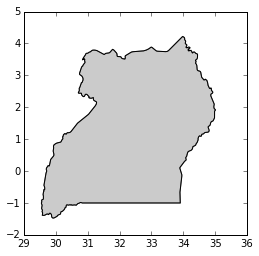

In [8]:
geom_uganda.plot()

In [10]:
geom_ss = ebola_gdf[ebola_gdf.country_name == "Sudan (South Sudan)"][0:1]["geometry"]

geom_ss

28    POINT (29.66679 7.869943)
Name: geometry, dtype: object

In [33]:
type(geom_ss)

geopandas.geoseries.GeoSeries

In [13]:
json_str_ss = ebola_gdf[ebola_gdf.country_name == "Sudan (South Sudan)"][0:1]["geometry_geojson"]

json_str_ss

28    {u'type': u'Polygon', u'coordinates': [[[33.96...
Name: geometry_geojson, dtype: object

In [32]:
type(json_str_ss)

pandas.core.series.Series

In [37]:
ds = dict(json_str_ss)

In [35]:
import json

In [66]:
str_ss = json.dumps(ds.get(28))
print(str_ss)

"{u'type': u'Polygon', u'coordinates': [[[33.963392999999996, 9.464285], [33.97498, 8.68456], [33.8255, 8.37916], [33.2948, 8.35458], [32.95418, 7.78497], [33.56829, 7.7133400000000005], [34.0751, 7.22595], [34.25032, 6.82607], [34.70702, 6.59422], [35.298007, 5.506], [34.620196, 4.847123], [34.005, 4.249885], [33.39, 3.79], [32.68642, 3.79232], [31.88145, 3.5582700000000003], [31.24556, 3.7819000000000003], [30.83385, 3.50917], [29.95349, 4.1737], [29.715995, 4.600805], [29.159078, 4.389267], [28.696678, 4.455077], [28.428994, 4.287155], [27.979977, 4.408413], [27.374226, 5.233944], [27.213409, 5.550953], [26.465909, 5.946717], [26.213418, 6.546603], [25.796648, 6.979316], [25.124131, 7.500085], [25.114932, 7.825104], [24.567369, 8.229188], [23.88698, 8.61973], [24.194068, 8.728696], [24.537415, 8.917538], [24.794926, 9.810241], [25.069603999999998, 10.27376], [25.790633, 10.411099], [25.962307, 10.136421], [26.477328, 9.55273], [26.752006, 9.466893], [27.112521, 9.638567], [27.833551

In [80]:
json_ss = json.loads('{"type": "Polygon", "coordinates": [[[33.963392999999996, 9.464285], [33.97498, 8.68456], [33.8255, 8.37916], [33.2948, 8.35458], [32.95418, 7.78497], [33.56829, 7.7133400000000005], [34.0751, 7.22595], [34.25032, 6.82607], [34.70702, 6.59422], [35.298007, 5.506], [34.620196, 4.847123], [34.005, 4.249885], [33.39, 3.79], [32.68642, 3.79232], [31.88145, 3.5582700000000003], [31.24556, 3.7819000000000003], [30.83385, 3.50917], [29.95349, 4.1737], [29.715995, 4.600805], [29.159078, 4.389267], [28.696678, 4.455077], [28.428994, 4.287155], [27.979977, 4.408413], [27.374226, 5.233944], [27.213409, 5.550953], [26.465909, 5.946717], [26.213418, 6.546603], [25.796648, 6.979316], [25.124131, 7.500085], [25.114932, 7.825104], [24.567369, 8.229188], [23.88698, 8.61973], [24.194068, 8.728696], [24.537415, 8.917538], [24.794926, 9.810241], [25.069603999999998, 10.27376], [25.790633, 10.411099], [25.962307, 10.136421], [26.477328, 9.55273], [26.752006, 9.466893], [27.112521, 9.638567], [27.833551, 9.604232], [27.97089, 9.398224], [28.966597, 9.398224], [29.000932, 9.604232], [29.515953, 9.793074], [29.618957, 10.084919], [29.996639, 10.290927], [30.837841, 9.707237], [31.352862000000002, 9.810241], [31.850716, 10.531271], [32.400072, 11.080626], [32.314235, 11.681484], [32.073892, 11.97333], [32.67475, 12.024832], [32.743419, 12.248008], [33.206938, 12.179338], [33.086766, 11.441141], [33.206938, 10.720112], [33.721959, 10.325262], [33.842131, 9.981915], [33.824963, 9.484061], [33.963392999999996, 9.464285]]]}')

In [83]:
coord_ss = json_ss.get('coordinates')

In [91]:
polyg_ss = []

for l in coord_ss[0]:
    polyg_ss.append((l[0], l[1]))

In [92]:
polyg_ss

[(33.963392999999996, 9.464285),
 (33.97498, 8.68456),
 (33.8255, 8.37916),
 (33.2948, 8.35458),
 (32.95418, 7.78497),
 (33.56829, 7.7133400000000005),
 (34.0751, 7.22595),
 (34.25032, 6.82607),
 (34.70702, 6.59422),
 (35.298007, 5.506),
 (34.620196, 4.847123),
 (34.005, 4.249885),
 (33.39, 3.79),
 (32.68642, 3.79232),
 (31.88145, 3.5582700000000003),
 (31.24556, 3.7819000000000003),
 (30.83385, 3.50917),
 (29.95349, 4.1737),
 (29.715995, 4.600805),
 (29.159078, 4.389267),
 (28.696678, 4.455077),
 (28.428994, 4.287155),
 (27.979977, 4.408413),
 (27.374226, 5.233944),
 (27.213409, 5.550953),
 (26.465909, 5.946717),
 (26.213418, 6.546603),
 (25.796648, 6.979316),
 (25.124131, 7.500085),
 (25.114932, 7.825104),
 (24.567369, 8.229188),
 (23.88698, 8.61973),
 (24.194068, 8.728696),
 (24.537415, 8.917538),
 (24.794926, 9.810241),
 (25.069603999999998, 10.27376),
 (25.790633, 10.411099),
 (25.962307, 10.136421),
 (26.477328, 9.55273),
 (26.752006, 9.466893),
 (27.112521, 9.638567),
 (27.83355

In [94]:
#gs_ss = g.GeoSeries(polyg_ss)

#gs_ss.plot()